# Лабораторна робота №6
**Тема:** Основи роботи з бібліотекою Matplotlib <br>
**Мета:** Отримати базові знання та навички роботи з бібліотекою Matplotlib

---

### Вимоги:
- У кожній комірці вказати постановку задачі та рівняння у LaTeX
- Побудувати три прямі:
  - кожна — на окремому графіку з різним кольорів і типом лінії;
  - усі графіки мають спільну вісь ординат і підпис.
- Побудувати всі прямі разом на одному графіку:
  - різні кольори й типи ліній (не використовувати стандартні синій/помаранчевий/зелений);
  - додати легенду, сітку, назву, підписи осей;
  - позначити точки перетину (знайти через `numpy.linalg.solve`);
  - заповнити область перетину кольором.

In [1]:
print(f"Варіант №{ord("D") % 10 + 1}")

Варіант №9


### Постанова задачі (варіант №9)

Необхідно побудувати три прямі, задані рівняннями:
$$
\begin{cases}
8.3x_{1} + 8.2x_{2} = 134,\\\\
-10.2x_{1} + 15.2x_{2} = 102,\\\\
14.5x_{1} - 7.3x_{2} = 141.
\end{cases}
$$

Кожне рівняння описує лінійну залежність між змінними $x_{1}$ та $x_{2}$.
Для побудови графіків виразимо $x_{2}$ через $x_{1}$:

$$
x_{2}^{(1)} = \frac{134 - 8.3x_{1}}{8.2}, \qquad
x_{2}^{(2)} = \frac{102 + 10.2x_{1}}{15.2}, \qquad
x_{2}^{(3)} = \frac{141 - 14.5x_{1}}{-7.3}.
$$

Для визначення точок перетину потрібно розв’язати системи рівнянь для кожної пари прямих:

- **L₁ ∩ L₂**
  $$
  \begin{cases}
  8.3x_{1} + 8.2x_{2} = 134,\\\\
  -10.2x_{1} + 15.2x_{2} = 102.
  \end{cases}
  $$

- **L₁ ∩ L₃**
  $$
  \begin{cases}
  8.3x_{1} + 8.2x_{2} = 134,\\\\
  14.5x_{1} - 7.3x_{2} = 141.
  \end{cases}
  $$

- **L₂ ∩ L₃**
  $$
  \begin{cases}
  -10.2x_{1} + 15.2x_{2} = 102,\\\\
  14.5x_{1} - 7.3x_{2} = 141.
  \end{cases}
  $$

Розв’язання виконується за допомогою `np.linalg.solve(A, B)`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A12 = np.array([[8.3, 8.2], [-10.2, 15.2]])
B12 = np.array([134, 102])
P12 = np.linalg.solve(A12, B12)

A13 = np.array([[8.3, 8.2], [14.5, -7.3]])
B13 = np.array([134, 141])
P13 = np.linalg.solve(A13, B13)

A23 = np.array([[-10.2, 15.2], [14.5, -7.3]])
B23 = np.array([102, 141])
P23 = np.linalg.solve(A23, B23)

x_coords = [P12[0], P13[0], P23[0]]
y_coords = [P12[1], P13[1], P23[1]]

x_range_val = max(x_coords) - min(x_coords)
y_range_val = max(y_coords) - min(y_coords)

x_padding = max(x_range_val * 0.3, 2.0)
y_padding = max(y_range_val * 0.3, 2.0)

x_min, x_max = min(x_coords) - x_padding, max(x_coords) + x_padding
y_min, y_max = min(y_coords) - y_padding, max(y_coords) + y_padding

x1 = np.linspace(x_min, x_max, 400)

def L1(x): return (134 - 8.3 * x) / 8.2
def L2(x): return (102 + 10.2 * x) / 15.2
def L3(x): return (141 - 14.5 * x) / -7.3

x2_1 = L1(x1)
x2_2 = L2(x1)
x2_3 = L3(x1)

def label_line(ax, f, text, color, x_range_limits, offset_pts=(0, 0), angle=0):
    x_mid = (x_range_limits[0] + x_range_limits[1]) / 2
    y_mid = f(x_mid)
    
    ax.annotate(
        text,
        xy=(x_mid, y_mid),
        xytext=offset_pts,
        textcoords='offset points',
        rotation=angle,
        rotation_mode='anchor',
        color=color,
        fontsize=10,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec=color, alpha=0.9)
    )

def save_all(fig, base_name, dpi=100):
    for ext in ("png", "jpg", "svg"):
        fig.savefig(f"{base_name}.{ext}", dpi=dpi, bbox_inches="tight")
    print(f"Збережено: {base_name}.png, .jpg, .svg")

Збережено: variant9_separate_plots.png, .jpg, .svg


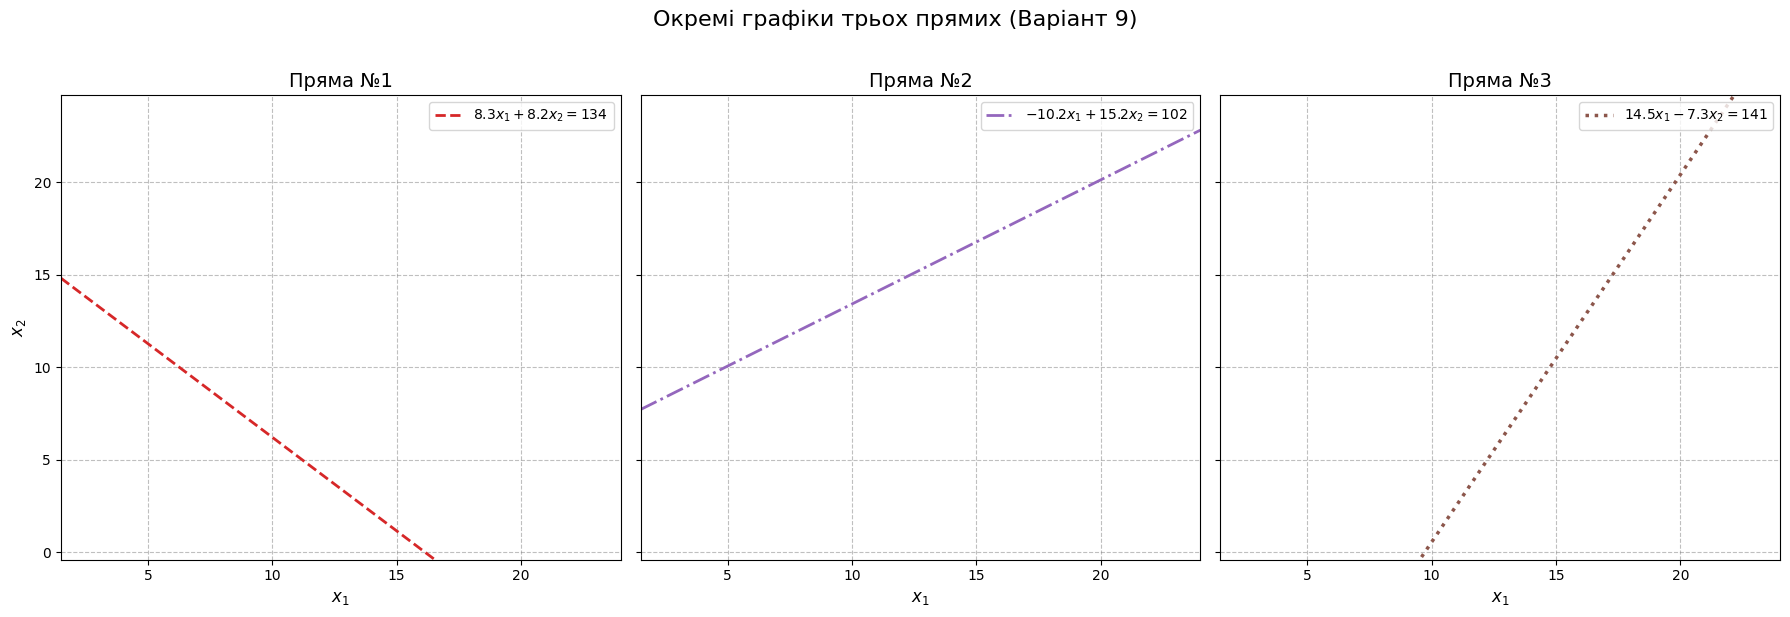

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=100, sharey=True)

ax1.plot(x1, x2_1, linestyle='--', color='#D62728', linewidth=2, label=r'$8.3x_1 + 8.2x_2 = 134$')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xlabel('$x_1$', fontsize=12)
ax1.set_ylabel('$x_2$', fontsize=12)
ax1.set_title('Пряма №1', fontsize=14)
ax1.grid(True, linestyle='--', color='gray', alpha=0.5)
ax1.legend(loc='upper right', frameon=True)

ax2.plot(x1, x2_2, linestyle='-.', color='#9467BD', linewidth=2, label=r'$-10.2x_1 + 15.2x_2 = 102$')
ax2.set_xlim(x_min, x_max)
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_title('Пряма №2', fontsize=14)
ax2.grid(True, linestyle='--', color='gray', alpha=0.5)
ax2.legend(loc='upper right', frameon=True)

ax3.plot(x1, x2_3, linestyle=':', color='#8C564B', linewidth=2.5, label=r'$14.5x_1 - 7.3x_2 = 141$')
ax3.set_xlim(x_min, x_max)
ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_title('Пряма №3', fontsize=14)
ax3.grid(True, linestyle='--', color='gray', alpha=0.5)
ax3.legend(loc='upper right', frameon=True)

fig.suptitle("Окремі графіки трьох прямих (Варіант 9)", fontsize=16, y=1.02)
fig.tight_layout()

save_all(fig, "variant9_separate_plots")
plt.show()

Збережено: variant9_combined_plot.png, .jpg, .svg


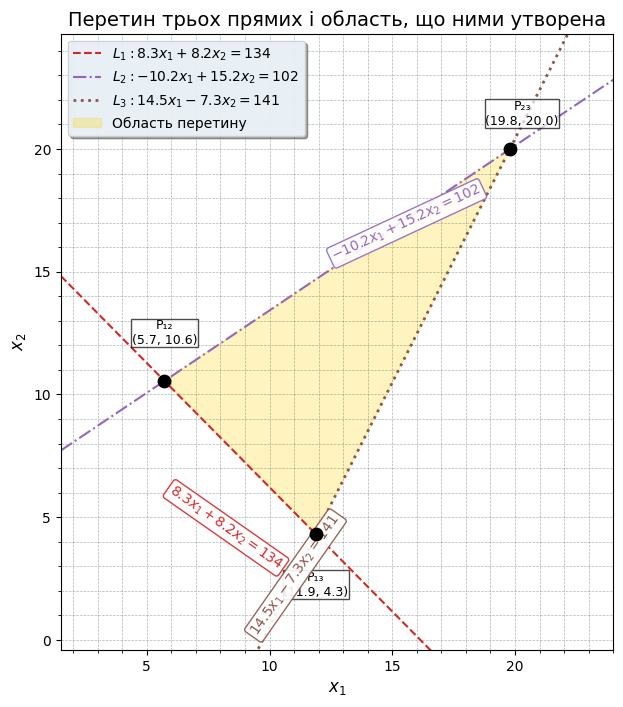

In [5]:
fig_main, ax = plt.subplots(figsize=(10, 8), dpi=100)

color1 = '#D62728' 
color2 = '#9467BD'
color3 = '#8C564B' 

ax.plot(x1, x2_1, linestyle='--', color=color1, linewidth=1.5, label=r'$L_1: 8.3x_1 + 8.2x_2 = 134$')
ax.plot(x1, x2_2, linestyle='-.', color=color2, linewidth=1.5, label=r'$L_2: -10.2x_1 + 15.2x_2 = 102$')
ax.plot(x1, x2_3, linestyle=':',  color=color3, linewidth=2.0, label=r'$L_3: 14.5x_1 - 7.3x_2 = 141$')

ax.scatter(*P12, color='black', s=80, zorder=5, marker='o')
ax.scatter(*P13, color='black', s=80, zorder=5, marker='o')
ax.scatter(*P23, color='black', s=80, zorder=5, marker='o')

ax.text(P12[0], P12[1] + 1.5, f'P₁₂\n({P12[0]:.1f}, {P12[1]:.1f})', fontsize=9, ha='center', bbox=dict(fc='white', alpha=0.7, pad=0.3))
ax.text(P13[0], P13[1] - 2.5, f'P₁₃\n({P13[0]:.1f}, {P13[1]:.1f})', fontsize=9, ha='center', bbox=dict(fc='white', alpha=0.7, pad=0.3))
ax.text(P23[0] + 0.5, P23[1] + 1.0, f'P₂₃\n({P23[0]:.1f}, {P23[1]:.1f})', fontsize=9, ha='center', bbox=dict(fc='white', alpha=0.7, pad=0.3))


triangle_x = [P12[0], P23[0], P13[0]]
triangle_y = [P12[1], P23[1], P13[1]]
ax.fill(triangle_x, triangle_y, color='#FFD700', alpha=0.25, label='Область перетину')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_title('Перетин трьох прямих і область, що ними утворена', fontsize=14)


ax.grid(True, which='both', linestyle='--', color='#2F4F4F', linewidth=0.5, alpha=0.4)
ax.minorticks_on()

label_line(ax, L1, r'$8.3x_1 + 8.2x_2 = 134$', color1, (x_min, x_max), 
           offset_pts=(-80, 20), angle=-35)

label_line(ax, L2, r'$-10.2x_1 + 15.2x_2 = 102$', color2, (x_min, x_max), 
           offset_pts=(50, 30), angle=25)

label_line(ax, L3, r'$14.5x_1 - 7.3x_2 = 141$', color3, (x_min, x_max), 
           offset_pts=(-30, -60), angle=55)

ax.legend(loc='upper left', framealpha=0.9, facecolor='#F0F8FF', shadow=True)
ax.set_aspect('equal')

save_all(fig_main, "variant9_combined_plot")
plt.show()